In [25]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from typing import Annotated
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from IPython.display import Image, display

In [ ]:
load_dotenv()

class State(TypedDict):
    messages:Annotated[list,add_messages]

gpt_llm = ChatOpenAI(model="gpt-4o-mini")

def superbot(state:State):
    return {"messages":gpt_llm.invoke(state["messages"])}

graph=StateGraph(State)


content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-COlx3lkPv7oZCtA5AStYHtTWkSDld', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--3418dfb8-9783-4729-b5af-5bb7ef584ce2-0' usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [27]:
graph.add_node("Amazebot",superbot)
graph.add_edge(START,"Amazebot")
graph.add_edge("Amazebot", END)

graph_compiler= graph.compile()


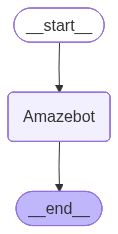

In [28]:
display(Image(graph_compiler.get_graph().draw_mermaid_png()))

In [29]:
graph_compiler.invoke({"messages":"Hi, I am Gaurav and I love playing tennis."})

{'messages': [HumanMessage(content='Hi, I am Gaurav and I love playing tennis.', additional_kwargs={}, response_metadata={}, id='d9afa514-5f64-4a80-bc80-cccb4f3dccc1'),
  AIMessage(content="Hi Gaurav! That's great to hear! Tennis is a fantastic sport that combines skill, strategy, and athletics. Do you play casually, or are you involved in competitive tennis?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 20, 'total_tokens': 57, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-COlxEaRnUWSy2XuJLZQZJEZHgqu1E', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a4a09afe-13fa-4bf1-a70b-34eff820afdc-0', usage_metadata={'input_tokens': 20, 'output_

# Streaming the messages


In [ ]:
for event in graph_compiler.stream({"messages":"Hi, I am Gaurav and I love playing tennis."}):
    print(event)

<generator object Pregel.stream at 0x10ca6fda0>